In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random as ran
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd 
from csv import reader

# 1. Helper Methods

This block defines the helper functions that are need to implment the K-means algorithm.
1. test_dev_split() :- Is used to split the data randomly using split_val between 0 and 1.
2. calculate_distance() :- Is used to calculate disatance using 'euclidean' , 'normalized Euclidean ' or 'cosine similarity'. 
3. KNN_neighbors_list_For() : It is used to create a list of all the K neighbors using the calculated distance .
4. predict() : It is use to predict the ouput using the given inputs.
5. k_neighbors() : It is used append the prediction with the corresponding values that were used to make the prediction.

In [2]:
# To split the data randomly into testing data and development data
def test_dev_split(data , split_val = 0.7):
    test_data = list(data)
    dev_data = list()
    database_len = len(list(data))
    
    dev_size = split_val* database_len
    test_size  = (1-split_val)* database_len
   
    while len(dev_data) < dev_size:
        ind = ran.randrange(database_len)
        dev_data.append(test_data[ind])
        test_data.pop(ind)
        database_len -= 1
    
    return dev_data ,test_data

# To calculate the distance between points 
def calculate_distance(list1,list2,Method):
    distance = 0.0 
    
    if Method == "euclidean":
        for i in range(len(list1)-1):
            distance += np.square(list1[i] - list2[i])
        return np.sqrt(distance)
   
    elif Method == "normalizedeuclidean":
        for i in range(len(list1)-1):
            distance += np.square(list1[i] - list2[i])
        return np.sqrt(distance/(len(list1)))
    
    elif Method == "cosine":
        cos_distance = np.dot(list1,list2[0:4]) / (np.linalg.norm(list1) * np.linalg.norm(list2[0:4]) )
        return (1-cos_distance)
    
# To find 'k' nearest neighbors between two lists              
def KNN_neighbors_list_For(list1 , list2 , distance_method , k ):
    distance = list()
    for row in list1:
        distance.append((row ,calculate_distance(list2 , row , distance_method)))
    distance.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(k):
        neighbors.append(distance[i][0])
        
    return neighbors

# To predict the value between two lists  
def predict(list1, list2, distance_method, k):
    neighbors = KNN_neighbors_list_For(list1, list2, distance_method ,k)
    values = [row[-1] for row in neighbors]
    prediction = max(set(values), key=values.count)
    return prediction

# To append the prediction with its corresponding values
def k_neighbors(list1, list2, distance_method,k):
    predictions = list()
    for row in list2:
        output = predict(list1, row,distance_method ,k)
        predictions.append(output)
    return(predictions)      

# 2. Evaluation Methods 

These methods are used to calculate the accuracy of the dataset.

In [3]:

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm 
def evaluate_algorithm(dev_data, test_data, distance_method, k):

    test_d = list()
    for row in test_data:
        row_copy = list(row)
        test_d.append(row_copy)
        row_copy.pop(-1)
    
    predicted = k_neighbors(dev_data, test_d,distance_method,k)
    actual = [row[-1] for row in test_data]
    accuracy = accuracy_metric(actual, predicted)
    return accuracy

# 3. Data Pre-processing Methods

These methods are used to read the data using inbuilt file reader and prepare it for the computer. The data must be processed so that it can be understood by the machine. The string data must be converted into int and float values so that it can be understood by the computer.

In [4]:
def convert_csv_to_list():
    file = open("iris.data", "r")
    lines = reader(file)
    return list(lines)

def prepare_data(dataset):
    for row in dataset:
        for i in range(4):
            row[i] = float(row[i].strip())           
    class_values = [row[4] for row in dataset]
    dict_data = dict()
    for i, value in enumerate(set(class_values)):
        dict_data[value] = i
    for row in dataset:
        row[4] = dict_data[row[4]]

    return dataset,dict_data

# 4. Implementing the Algorithm 

In [5]:
dataset = convert_csv_to_list()
dataset.pop(-1)
dat,dic = prepare_data(dataset)   
K_values = [1,3,5,7]
Distance_methods = ["euclidean","normalizedeuclidean" ,"cosine"]
dev_data ,test_data = test_dev_split(dataset)
dev_data_train , dev_data_test = test_dev_split(dev_data,split_val = 0.6)

## 4.1 Using Euclidean Distance

In [6]:
Accuracy_e = []
Accuracy_e.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[0],K_values[0]))
Accuracy_e.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[0],K_values[1]))
Accuracy_e.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[0],K_values[2]))
Accuracy_e.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[0],K_values[3]))

## 4.2 Using Normalized Euclidean Distance

In [7]:
Accuracy_ne = []
Accuracy_ne.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[1],K_values[0]))
Accuracy_ne.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[1],K_values[1]))
Accuracy_ne.append( evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[1],K_values[2]))
Accuracy_ne.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[1],K_values[3]))

## 4.3 Using Cosine Similarity

In [8]:
Accuracy_c = []
Accuracy_c.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[2],K_values[0]))
Accuracy_c.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[2],K_values[1]))
Accuracy_c.append( evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[2],K_values[2]))
Accuracy_c.append(evaluate_algorithm(dev_data_train,dev_data_test,Distance_methods[2],K_values[3]))

## 5. Data visualization

This code is used to create graphs in order to visualize the data. Visualizing the data help us better understand the result. 

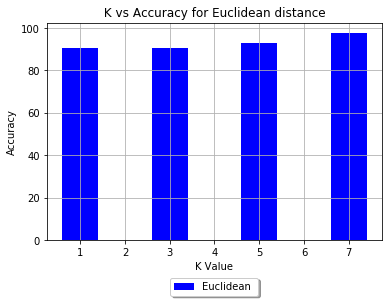

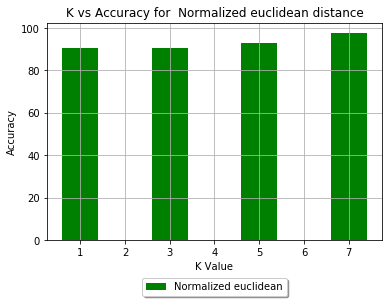

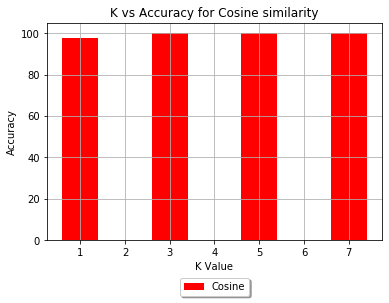

In [9]:
Accuracy_e = np.array(Accuracy_e ,dtype=float).reshape(4)
Accuracy_c = np.array(Accuracy_c ,dtype=float).reshape(4)
Accuracy_ne = np.array(Accuracy_ne ,dtype=float).reshape(4)


ax = plt.subplot(1, 1, 1)
e = ax.bar(np.array(K_values) , height= Accuracy_e , color='b', align='center',label ="Euclidean ")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)
plt.grid()
plt.title(" K vs Accuracy for Euclidean distance ")
plt.ylabel('Accuracy')
plt.xlabel('K Value')
plt.show()


ax = plt.subplot(1, 1, 1)
en = ax.bar(np.array(K_values), height= Accuracy_ne , color='g', align='center',label ="Normalized euclidean")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)
plt.grid()
plt.title("K vs Accuracy for  Normalized euclidean distance")
plt.ylabel('Accuracy')
plt.xlabel('K Value')
plt.show()


ax = plt.subplot(1, 1, 1)
c = ax.bar(np.array(K_values), height= Accuracy_c, color='r', align='center',label ="Cosine")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)
plt.grid()
plt.title("K vs Accuracy for Cosine similarity")
plt.ylabel('Accuracy')
plt.xlabel('K Value')
plt.show()

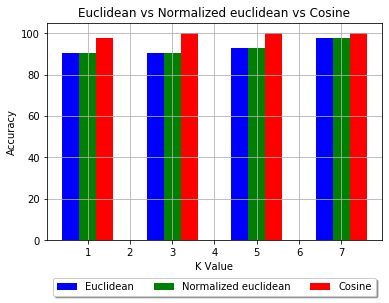

In [10]:
ax = plt.subplot(111)
e = ax.bar(np.array(K_values) -0.4 , height= Accuracy_e ,width=0.4, color='b', align='center',label ="Euclidean")
en = ax.bar(np.array(K_values), height= Accuracy_ne ,width=0.4, color='g', align='center',label ="Normalized euclidean")
c = ax.bar(np.array(K_values)+0.4, height= Accuracy_c,width=0.4, color='r', align='center',label ="Cosine")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)
plt.title("Euclidean vs Normalized euclidean vs Cosine")
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('K Value')
plt.show()

# 6. Running on Training Set

## Selected Hyperparameters
1. Distance Metric used is found using the Cosine Similarity
2. K value used is 5.

In [34]:



Final_accuracy = evaluate_algorithm(dev_data,test_data,Distance_methods[2],K_values[2])
print("By Using Cosine similarity and K value equals 7 hyperparameters")
print(str("I got %.3f%%. accuracy " % Final_accuracy))

By Using Cosine similarity and K value equals 7 hyperparameters
I got 95.556%. accuracy 
